In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.core.display import HTML
import pyAgrum.causal as csl
import pandas as pd
from pyAgrum.lib.bn_vs_bn import GraphicalBNComparator
from sklearn.model_selection import train_test_split
import pyAgrum.lib.explain as explain
import pyAgrum.lib.bn_vs_bn as bnvsbn
import pyAgrum.causal.notebook as cslnb

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

### Import the network

In [2]:
network= gum.loadBN("networks/bc.net")

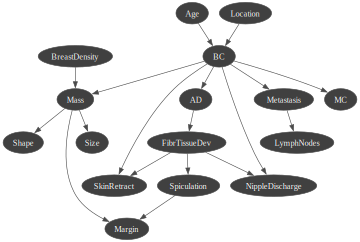

In [3]:
gnb.show(network)

In [4]:
df = pd.read_csv("data/bc.csv")

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [6]:
train_df.to_csv("data/bc_train.csv", index=False)
test_df.to_csv("data/bc_test.csv", index=False)

In [7]:
learner=gum.BNLearner(f"data/bc_train.csv") 
learner.useGreedyHillClimbing()
learned_network = learner.learnBN()
print(f"Learned network in {1000*learner.currentTime()}ms")

Learned network in 53.9845ms


In [8]:
gnb.flow.clear()
gnb.flow.add(gnb.getBNDiff(network,learned_network,size="8!"),f"diff with original")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

In [9]:
cmp=GraphicalBNComparator(network,learned_network)
cmp.hamming()

{'hamming': 2, 'structural hamming': 10}

In [10]:
learned_network['BC']

(pyAgrum.DiscreteVariable@000002021988F690) BC:Labelized({Insitu|Invasive|No})

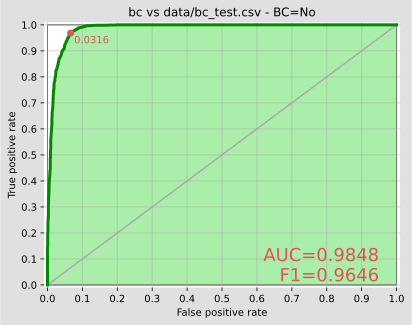

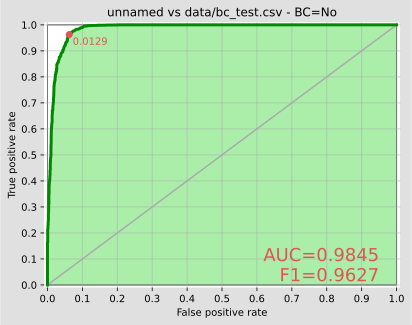

(0.9845298608456318,
 np.float64(0.01289299025),
 0.9875792389009289,
 np.float64(0.0055566286))

In [11]:
showROC(network,'data/bc_test.csv','BC','No',show_progress=False)
showROC(learned_network,'data/bc_test.csv','BC','No',show_progress=False)

In [17]:
learner.addMandatoryArc("Location","BC")

(pyAgrum.BNLearner<double>@0000020206D37810) Filename                  : data/bc_train.csv
Size                      : (16000,16)
Variables                 : BreastDensity[3], Location[4], Age[4], BC[3], Mass[3], AD[2], Metastasis[2], MC[2], Size[3], Shape[4], FibrTissueDev[2], LymphNodes[2], SkinRetract[2], NippleDischarge[2], Spiculation[2], Margin[2]
Induced types             : True
Missing values            : False
Algorithm                 : Greedy Hill Climbing
Score                     : BDeu  (Not used for constraint-based algorithms)
Correction                : MDL  (Not used for score-based algorithms)
Prior                     : -
Constraint Mandatory Arcs : {Age->BC, Location->BC}

In [18]:
steered_learned_network = learner.learnBN()

In [19]:
gnb.flow.clear()
gnb.flow.add(gnb.getBNDiff(network,steered_learned_network,size="8!"),f"diff with original")
gnb.flow.add(bnvsbn.graphDiffLegend())
gnb.flow.display()

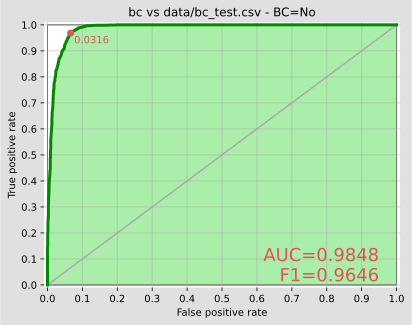

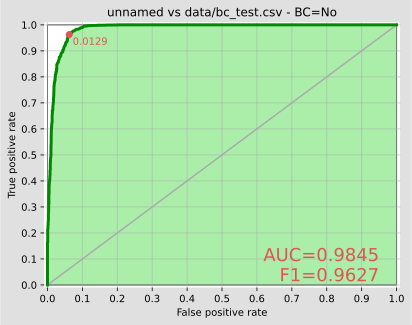

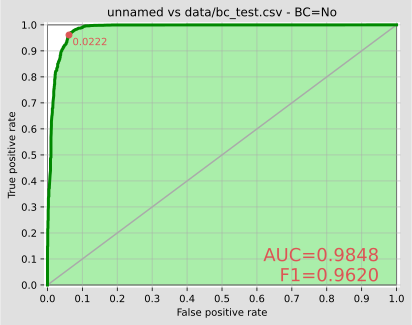

(0.9847695574179708,
 np.float64(0.0221664368),
 0.9878559857427606,
 np.float64(0.009389005999999998))

In [20]:
showROC(network,'data/bc_test.csv','BC','No',show_progress=False)
showROC(learned_network,'data/bc_test.csv','BC','No',show_progress=False)
showROC(steered_learned_network,'data/bc_test.csv','BC','No',show_progress=False)


In [16]:
ess = learner.learnEssentialGraph()